<a href="https://colab.research.google.com/github/joethecoolest/Bai_Tap_AI/blob/main/face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from google.colab import drive
drive.mount("/content/drive",force_remount=True)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/CNN/training_test',
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical')
test_set=train_datagen.flow_from_directory('/content/drive/MyDrive/CNN/test_set',
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical')


Mounted at /content/drive
Found 60 images belonging to 3 classes.
Found 90 images belonging to 3 classes.


In [ ]:
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
#model.add(Dropout(0,2))
model.add(Dense(3,activation='Softmax'))
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
#opt = SGD(lr = 0.01, momentum = 0.9)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
callbacks=[EarlyStopping(monitor='val_loss',patience=100)]
history=model.fit(training_set,
                  steps_per_epoch=len(training_set),
                  batch_size = 64,
                  epochs=150,
                  validation_data=test_set,
                  validation_steps=len(test_set),
                  callbacks=callbacks,
                  verbose = 1)

Epoch 1/150
2/2 [==============================] - 24s 15s/step - loss: 23.3024 - accuracy: 0.3667 - val_loss: 31.4486 - val_accuracy: 0.3333
Epoch 2/150
2/2 [==============================] - 22s 14s/step - loss: 17.2840 - accuracy: 0.3333 - val_loss: 3.8250 - val_accuracy: 0.3333
Epoch 3/150
2/2 [==============================] - 25s 17s/step - loss: 3.4339 - accuracy: 0.2833 - val_loss: 1.6428 - val_accuracy: 0.6667
Epoch 4/150
2/2 [==============================] - 22s 13s/step - loss: 1.5326 - accuracy: 0.6500 - val_loss: 0.3219 - val_accuracy: 1.0000
Epoch 5/150
2/2 [==============================] - 22s 13s/step - loss: 0.4748 - accuracy: 0.7833 - val_loss: 0.3595 - val_accuracy: 1.0000
Epoch 6/150
2/2 [==============================] - 22s 14s/step - loss: 0.2721 - accuracy: 1.0000 - val_loss: 0.1093 - val_accuracy: 1.0000
Epoch 7/150
2/2 [==============================] - 22s 13s/step - loss: 0.0827 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 8/150
2/2 [

In [ ]:
#đánh giá chất lượng của mô hình và vẽ lại
score = model.evaluate(test_set,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])

Sai số kiểm tra là:  4.79482150694821e-06
Độ chính xác kiểm tra là:  1.0


In [ ]:
model.save('model_faceCNN.h5')

In [ ]:
from tensorflow.keras.models import load_model
model=load_model('model_faceCNN.h5')

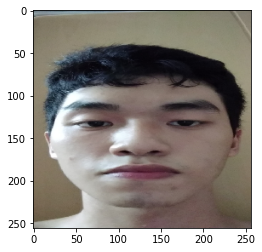

In [ ]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt
test_img=load_img('/content/drive/MyDrive/CNN/single_prediction/tri.jpg',target_size=(256,256))
plt.imshow(test_img)

tri


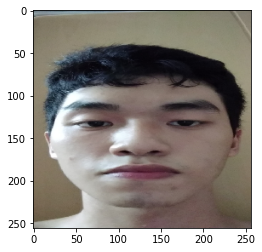

In [ ]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt
test_img=load_img('/content/drive/MyDrive/CNN/single_prediction/tri.jpg',target_size=(256,256))
plt.imshow(test_img)
import numpy as np
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
if round(result[0][0])==1:
   prediction="tri"
elif round(result[0][1])==1:
   prediction="trieu"
elif round(result[0][2])==1:
   prediction="tung"  
print(prediction) 


trieu


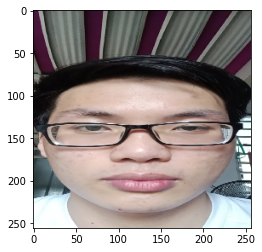

In [ ]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt
test_img=load_img('/content/drive/MyDrive/CNN/single_prediction/trieu.jpg',target_size=(256,256))
plt.imshow(test_img)
import numpy as np
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
if round(result[0][0])==1:
   prediction="tri"
elif round(result[0][1])==1:
   prediction="trieu"
elif round(result[0][2])==1:
   prediction="tung"  
print(prediction) 


tung


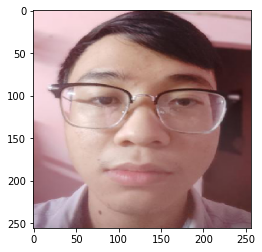

In [ ]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt
test_img=load_img('/content/drive/MyDrive/CNN/single_prediction/tung.jpg',target_size=(256,256))
plt.imshow(test_img)
import numpy as np
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
if round(result[0][0])==1:
   prediction="tri"
elif round(result[0][1])==1:
   prediction="trieu"
elif round(result[0][2])==1:
   prediction="tung"  
print(prediction) 